In [1]:
#Import modules

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [2]:
#Import data from CSV
combined_path = "Resources/clean_data2.csv"

In [3]:
#Import csvs
combined_df = pd.read_csv(combined_path)

In [4]:
#Read data from CSV
combined_df = pd.read_csv(combined_path)
combined_df

,State,County,POP2010,OHU2010,PovertyRate,MedianFamilyIncome,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,...,Years of Potential Life Lost Rate,% Obese,% Fair/Poor,# Diabetics,# Violent Crimes,# Unemployed,% Children in Poverty,Latitude,Longitude,Original Medicare
0,Alabama,Autauga,54571,20221,13.858333,61082.916667,2,2,1,2,...,9158.0,34,18,711.0,145.0,1327.0,19.0,32.534920,-86.642749,5784
1,Alabama,Baldwin,182265,73180,14.358065,60664.935484,3,3,3,2,...,7394.0,27,16,2615.0,415.0,4791.0,20.0,30.660970,-87.749840,28388
2,Alabama,Barbour,27457,9820,24.533333,43123.000000,3,3,1,2,...,8573.0,44,25,525.0,85.0,771.0,45.0,31.869603,-85.393197,4372
3,Alabama,Bibb,22915,7953,16.025000,43362.500000,0,0,0,1,...,11766.0,40,20,333.0,33.0,561.0,29.0,32.998644,-87.126439,2480
4,Alabama,Blount,57322,21578,17.911111,52136.000000,0,0,0,2,...,9333.0,35,19,705.0,123.0,1316.0,22.0,33.980867,-86.567371,6070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,Wyoming,Sweetwater,43806,16475,11.841667,81835.083333,0,0,0,2,...,6878.0,32,16,469.0,159.0,1053.0,10.0,41.659496,-108.879431,5641
3089,Wyoming,Teton,21294,8973,8.100000,89555.250000,0,0,0,0,...,3728.0,13,12,104.0,NaN,558.0,8.0,43.934637,-110.589810,3122
3090,Wyoming,Uinta,21118,7668,14.166667,65312.666667,0,0,0,0,...,7660.0,28,15,243.0,8.0,475.0,12.0,41.287492,-110.547562,2804
3091,Wyoming,Washakie,8533,3492,14.133333,62213.666667,0,1,0,0,...,7294.0,28,14,156.0,7.0,174.0,16.0,43.904997,-107.682861,1812


In [5]:
#Calculate the 0.10 quantile. This is what will be used for the poor environment cutoff.
#According to The Locator, 10% of the roughly 65,000 census tracts in the US are food deserts.
bottomten = combined_df["Food Environment Index"].quantile(q=0.10)
bottomten

5.5

In [6]:
#Creating bins based on cutoff value
bins = [0, float(bottomten), 10]
#bin names
ranges = ["Food Desert", "Healthy"]

In [66]:
#Slicing the data and placing into bins
binned_if_desert = pd.cut(combined_df["Food Environment Index"], bins, labels=ranges)
binned_if_desert

0           Healthy
1           Healthy
2       Food Desert
3           Healthy
4           Healthy
           ...     
3088        Healthy
3089        Healthy
3090        Healthy
3091        Healthy
3092        Healthy
Name: Food Environment Index, Length: 3093, dtype: category
Categories (2, object): [Food Desert < Healthy]

In [8]:
#Creating a column for food environment categories
combined_df["Environment Category"] = binned_if_desert
combined_df.reset_index(drop=True,inplace=True)

In [72]:
desert = combined_df.loc[combined_df["Environment Category"]=="Food Desert"]
print(desert[["State","County","Food Environment Index"]])

              State     County  Food Environment Index
2           Alabama    Barbour                     4.9
5           Alabama    Bullock                     3.8
11          Alabama    Choctaw                     5.4
12          Alabama     Clarke                     4.6
17          Alabama    Conecuh                     4.3
...             ...        ...                     ...
2913     Washington      Ferry                     4.6
2915     Washington   Garfield                     4.4
2938     Washington  Wahkiakum                     5.3
2994  West Virginia     Wetzel                     5.5
3037      Wisconsin  Menominee                     5.3

[331 rows x 3 columns]


In [9]:
#Creating series for each parameter. Calculating the sum for Medicare enrollees and # of diabetics per category enrollment.
population_total = combined_df.groupby("Environment Category")["Original Medicare"].sum()
diabetics_total = combined_df.groupby("Environment Category")["# Diabetics"].sum()

In [10]:
#Create dataframe to hold data
popsum_byenv__deserts_df = pd.DataFrame(
    {"Medicare Population Total": population_total,
    "Medicare Diabetic Total": diabetics_total})

In [11]:
#Adding Percent Diabetic with Medicare
popsum_byenv__deserts_df["Percent Diabetic"]=(popsum_byenv__deserts_df["Medicare Diabetic Total"]/popsum_byenv__deserts_df["Medicare Population Total"])*100
percent_diabetic2_df=popsum_byenv__deserts_df.reset_index()
percent_diabetic2_df

,Environment Category,Medicare Population Total,Medicare Diabetic Total,Percent Diabetic
0,Food Desert,1531226,157268.0,10.270724
1,Healthy,36236319,3129051.0,8.635124


In [12]:
#Pie plot for Food Desert Environment

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Diabetic","Non-Diabetic"]
sizes =  [159982,1403018]
colors = ["gold", "lightskyblue"]
explode = (0.1,0)

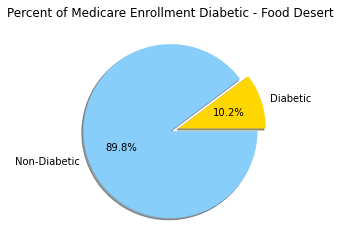

In [13]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Percent of Medicare Enrollment Diabetic - Food Desert")
#Save plot:
plt.savefig("PiePlots/Percent of Medicare Enrollment Diabetic - Food Desert.png")
plt.show()

In [14]:
#Pie plot for Healthy Food Environment

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Diabetic","Non-Diabetic"]
sizes =  [3108751,32864673]
colors = ["slateblue", "thistle"]
explode = (0.1,0)

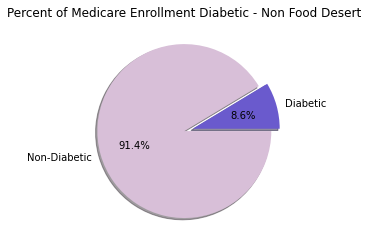

In [15]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Percent of Medicare Enrollment Diabetic - Non Food Desert")
#Save plot:
plt.savefig("PiePlots/Percent of Medicare Enrollment Diabetic - Non Food Desert.png")
plt.show()

In [16]:
#Obesity

In [17]:
#Creating a column for food environment categories
combined_df["Environment Category"] = binned_if_desert
combined_df.reset_index(drop=True,inplace=True)

In [18]:
#Creating series for each parameter. Calculating the average obesity rate in each environment.
obesity_average = combined_df.groupby("Environment Category")["% Obese"].mean()

In [19]:
#Create dataframe to hold data
obesity_byenv_df = pd.DataFrame(
    {"Obesity Rate Average": obesity_average})
obesity_byenv_df

,Obesity Rate Average
Environment Category,
Food Desert,33.238671
Healthy,30.808041


In [20]:
#Pie plot for Food Desert Environment: Obesity Rate Average

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Average Obesity Rate"," "]
sizes =  [33.243243,100-33.243243]
colors = ["#FF5768", "#c2b2b4"]
explode = (0.1,0)

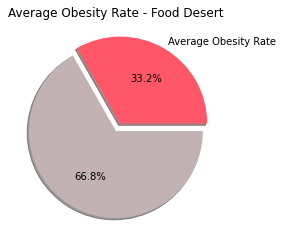

In [21]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Average Obesity Rate - Food Desert")
#Save plot:
plt.savefig("PiePlots/Average Obesity Rate - Food Desert.png")
plt.show()

In [22]:
#Pie plot for Non-Food Desert Environment: Obesity Rate Average

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Average Obesity Rate"," "]
sizes =  [30.811594,100-30.811594]
colors = ["#57ffee", "#b1c7c4"]
explode = (0.1,0)

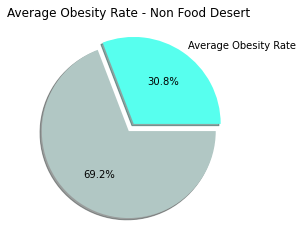

In [23]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Average Obesity Rate - Non Food Desert")
#Save plot:
plt.savefig("PiePlots/Average Obesity Rate - Non Food Desert.png")
plt.show()


In [24]:
#% Fair/Poor Health

In [25]:
#Creating a column for food environment categories
combined_df["Environment Category"] = binned_if_desert
combined_df.reset_index(drop=True,inplace=True)

In [26]:
#Creating series for each parameter. Calculating the average fair/poor health rate in each environment.
poor_health_average = combined_df.groupby("Environment Category")["% Fair/Poor"].mean()

In [27]:
#Create dataframe to hold data
poorhealth_byenv_df = pd.DataFrame(
    {"Fair/Poor Health Rate Average": poor_health_average})
poorhealth_byenv_df

,Fair/Poor Health Rate Average
Environment Category,
Food Desert,21.616314
Healthy,16.445491


In [28]:
#Pie plot for Food Desert Environment: Fair/Poor Health Rate Average

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Fair/Poor Health Rate"," "]
sizes =  [21.615616,100-21.615616]
colors = ["#33FFB5", "#c8dbd4"]
explode = (0.1,0)

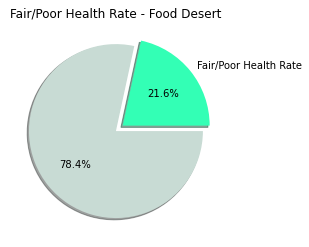

In [29]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Fair/Poor Health Rate - Food Desert")
#Save plot:
plt.savefig("PiePlots/Fair Poor Health Rate - Food Desert.png")
plt.show()


In [30]:
#Pie plot for Non-Food Desert Environment: Fair/Poor Health Rate Average

#Generate pie plot using pyplot
#Designating data to draw upon
labels = ["Fair/Poor Health Rate"," "]
sizes =  [16.455072,100-16.455072]
colors = ["#a588fc", "#d6d1e8"]
explode = (0.1,0)

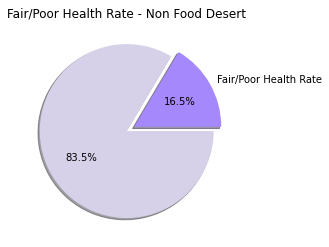

In [31]:
#Creating the pie chart based on the values above
plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Fair/Poor Health Rate - Non Food Desert")
#Save plot:
plt.savefig("PiePlots/Fair Poor Health Rate - Non Food Desert.png")
plt.show()


In [32]:
#Race breakdown
#Census defines race by five categories: White, Black, American Indian or Alaska Native, Asian, Native Hawaiian and Other Pacific Islander, and Multiracial
#Added hispanic for breakdown purposes
#Calculate count of all race tracts:
whitetract=combined_df["TractWhite"].sum()
blacktract=combined_df["TractBlack"].sum()
asiantract=combined_df["TractAsian"].sum()
nhopitract=combined_df["TractNHOPI"].sum()
aiantract=combined_df["TractAIAN"].sum()
omultirtract=combined_df["TractOMultir"].sum()
hispanictract=combined_df["TractHispanic"].sum()

In [33]:
all_tract=whitetract+blacktract+asiantract+nhopitract+aiantract+hispanictract
all_tract

329481134

In [34]:
#Creating a column for food environment categories
combined_df["Environment Category"] = binned_if_desert
combined_df.reset_index(drop=True,inplace=True)

In [35]:
#Creating series for each parameter. Calculating the sum of enrollees by race, grouped by environment.
white_pop = combined_df.groupby("Environment Category")["TractWhite"].sum()
black_pop = combined_df.groupby("Environment Category")["TractBlack"].sum()
asian_pop = combined_df.groupby("Environment Category")["TractAsian"].sum()
nhopi_pop = combined_df.groupby("Environment Category")["TractNHOPI"].sum()
aian_pop = combined_df.groupby("Environment Category")["TractAIAN"].sum()
omultir_pop = combined_df.groupby("Environment Category")["TractOMultir"].sum()
hispanic_pop = combined_df.groupby("Environment Category")["TractHispanic"].sum()

In [36]:
#Create dataframe to hold data
race_sum_deserts_df = pd.DataFrame(
    {"White": white_pop,
    "Black": black_pop,
    "Asian": asian_pop,
    "NHOPI": nhopi_pop,
    "AIAN": aian_pop,
    "Other/Multi": omultir_pop,
    "Hispanic/Latinx": hispanic_pop})
race_sum_deserts_df.reset_index()

,Environment Category,White,Black,Asian,NHOPI,AIAN,Other/Multi,Hispanic/Latinx
0,Food Desert,6048719,3948444,169211,11480,438434,621001,988722
1,Healthy,217087544,33871990,14635995,525799,2454102,27378974,49296655


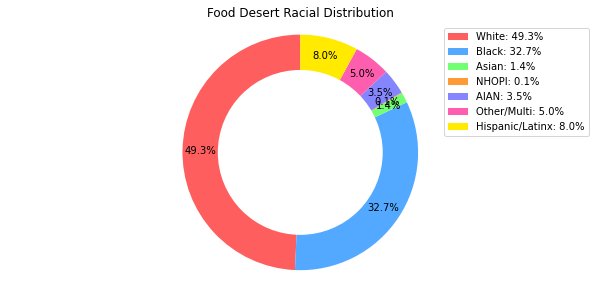

In [37]:
#Race Pie Chart
#Food Desert:
# Pie chart
labels = ['White: 49.3%', 'Black: 32.7%', 'Asian: 1.4%', 'NHOPI: 0.1%','AIAN: 3.5%','Other/Multi: 5.0%','Hispanic/Latinx: 8.0%']
sizes = [6192366,4110488,178566,11556,439300,632889,999993]
#colors
colors = ['#ff5e5e','#52a9ff','#72ff72','#ff9b37','#8585ff','#ff5eaf','#ffea00']




fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, autopct='%1.1f%%', startangle=90,pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout(4)
plt.title("Food Desert Racial Distribution")
plt.legend(labels)

fig.set_size_inches(10,5)

plt.savefig("PiePlots/Food Desert Racial Distribution.png")
plt.show()



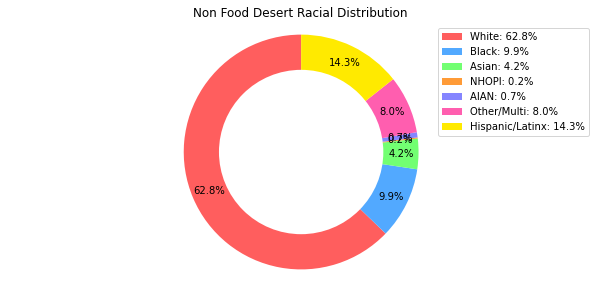

In [38]:
#Race Pie Chart
#Non Food Desert:
# Pie chart
labels = ['White: 62.8%', 'Black: 9.9%', 'Asian: 4.2%', 'NHOPI: 0.2%','AIAN: 0.7%','Other/Multi: 8.0%','Hispanic/Latinx: 14.3%']
sizes = [215548737,33849445,14395563,524949,2451822,27294395,49250707]
#colors
colors = ['#ff5e5e','#52a9ff','#72ff72','#ff9b37','#8585ff','#ff5eaf','#ffea00']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, autopct='%1.1f%%', startangle=90,pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout(4)
plt.title("Non Food Desert Racial Distribution")
plt.legend(labels)

fig.set_size_inches(10,5)

plt.savefig("PiePlots/Non Food Desert Racial Distribution.png")
plt.show()



In [39]:
#Montana pie charts

#Calculating known food desert, Blaine, Food Environment Index
blainemt = combined_df.loc[(combined_df["State"] == "Montana")&(combined_df["County"]== "Blaine")]
blainemt["Food Environment Index"]

1587    5.3
Name: Food Environment Index, dtype: float64

In [40]:
#Find Average Montana Food Environment Index
mt_info = combined_df.loc[combined_df["State"] == "Montana"]
mt_info.head()

,State,County,POP2010,OHU2010,PovertyRate,MedianFamilyIncome,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,...,% Obese,% Fair/Poor,# Diabetics,# Violent Crimes,# Unemployed,% Children in Poverty,Latitude,Longitude,Original Medicare,Environment Category
1585,Montana,Beaverhead,9246,4014,14.566667,53953.0,2,2,2,1,...,24,12,126.0,10.0,171.0,21.0,45.132700,-112.898820,1841,Healthy
1586,Montana,Big Horn,12865,4004,31.220000,46813.2,4,4,1,1,...,39,22,193.0,28.0,372.0,40.0,45.423382,-107.489853,1607,Food Desert
1587,Montana,Blaine,6491,2357,29.800000,38925.5,1,1,1,1,...,36,20,100.0,10.0,120.0,40.0,48.432676,-108.958602,1004,Food Desert
1588,Montana,Broadwater,5612,2347,11.250000,48507.5,0,0,0,0,...,30,12,64.0,20.0,124.0,16.0,46.332424,-111.495487,1111,Healthy
1589,Montana,Carbon,10078,4571,11.480000,60412.6,1,1,0,0,...,24,11,131.0,20.0,200.0,15.0,45.227386,-109.028016,1993,Healthy


In [41]:
#Info in question
important = mt_info[["State", "County", "Food Environment Index","POP2010", "PovertyRate", "MedianFamilyIncome","% Obese","% Fair/Poor","# Diabetics", "# Violent Crimes", "Original Medicare"]].copy()


In [42]:
avg_mt_fei=mt_info["Food Environment Index"].mean()
avg_mt_fei

6.375

In [43]:
#Calculate highest Food Environment Index for the state
max_mt_fei=mt_info["Food Environment Index"].max()
max_mt_fei

8.3

In [44]:
#Calculate highest Food Environment Index for the state
min_mt_fei=mt_info["Food Environment Index"].min()
min_mt_fei

3.1

In [45]:
#Find county name for max
max_name=mt_info.loc[mt_info["Food Environment Index"]==max_mt_fei]
max_name

,State,County,POP2010,OHU2010,PovertyRate,MedianFamilyIncome,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,...,% Obese,% Fair/Poor,# Diabetics,# Violent Crimes,# Unemployed,% Children in Poverty,Latitude,Longitude,Original Medicare,Environment Category
1597,Montana,Fallon,2890,1233,6.200000,67375.000000,0,0,0,0,...,28,10,35.0,3.0,46.0,10.0,46.333997,-104.417424,508,Healthy
1632,Montana,Stillwater,9117,3796,7.566667,72431.333333,0,0,0,0,...,22,11,134.0,21.0,183.0,10.0,45.669053,-109.395217,1692,Healthy


In [46]:
#Find county name for min
min_name=mt_info.loc[mt_info["Food Environment Index"]==min_mt_fei]
min_name
#Did not choose Meagher county due to population differences

,State,County,POP2010,OHU2010,PovertyRate,MedianFamilyIncome,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,...,% Obese,% Fair/Poor,# Diabetics,# Violent Crimes,# Unemployed,% Children in Poverty,Latitude,Longitude,Original Medicare,Environment Category
1614,Montana,Meagher,1891,806,14.1,44965.0,1,1,1,1,...,24,14,26.0,2.0,34.0,32.0,46.598224,-110.885661,521,Food Desert


In [47]:
#Chose Wheatland, MT to compare to Fallon due to similar population size (or as close possible)
wheatlandmt = combined_df.loc[(combined_df["State"] == "Montana")&(combined_df["County"]== "Wheatland")]
wheatlandmt["Food Environment Index"]

1638    3.4
Name: Food Environment Index, dtype: float64

In [48]:
wheatlandmt

,State,County,POP2010,OHU2010,PovertyRate,MedianFamilyIncome,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,...,% Obese,% Fair/Poor,# Diabetics,# Violent Crimes,# Unemployed,% Children in Poverty,Latitude,Longitude,Original Medicare,Environment Category
1638,Montana,Wheatland,2168,887,14.1,40956.0,1,1,1,1,...,25,14,23.0,2.0,43.0,33.0,46.466281,-109.844522,470,Food Desert


In [49]:
fallonmt = combined_df.loc[(combined_df["State"] == "Montana")&(combined_df["County"]== "Fallon")]
fallonmt

,State,County,POP2010,OHU2010,PovertyRate,MedianFamilyIncome,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,...,% Obese,% Fair/Poor,# Diabetics,# Violent Crimes,# Unemployed,% Children in Poverty,Latitude,Longitude,Original Medicare,Environment Category
1597,Montana,Fallon,2890,1233,6.2,67375.0,0,0,0,0,...,28,10,35.0,3.0,46.0,10.0,46.333997,-104.417424,508,Healthy


In [50]:
#Comparing Big Horn County (Food Desert) to Fergus County (Healthy Environment)

#Big Horn Info
bighornmt = combined_df.loc[(combined_df["State"] == "Montana")&(combined_df["County"]== "Big Horn")]
bighornmt

,State,County,POP2010,OHU2010,PovertyRate,MedianFamilyIncome,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,...,% Obese,% Fair/Poor,# Diabetics,# Violent Crimes,# Unemployed,% Children in Poverty,Latitude,Longitude,Original Medicare,Environment Category
1586,Montana,Big Horn,12865,4004,31.22,46813.2,4,4,1,1,...,39,22,193.0,28.0,372.0,40.0,45.423382,-107.489853,1607,Food Desert


In [51]:
#Fergus Info
fergusmt = combined_df.loc[(combined_df["State"] == "Montana")&(combined_df["County"]== "Fergus")]
fergusmt

,State,County,POP2010,OHU2010,PovertyRate,MedianFamilyIncome,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,...,% Obese,% Fair/Poor,# Diabetics,# Violent Crimes,# Unemployed,% Children in Poverty,Latitude,Longitude,Original Medicare,Environment Category
1598,Montana,Fergus,11586,5099,12.05,56331.5,0,0,0,0,...,26,11,146.0,39.0,239.0,18.0,47.26358,-109.224485,2252,Healthy


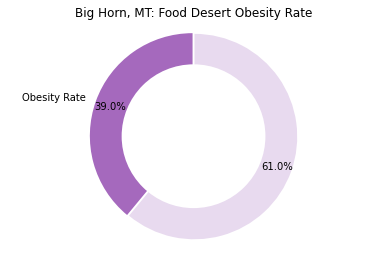

In [52]:
#Big Horn Obesity
#Food Desert:
# Pie chart
labels = ["Obesity Rate"," "]
sizes =  [39,100-39]
colors = ["#A569BD", "#E8DAEF"]
explode = (0.01, 0.01)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels,autopct='%1.1f%%',startangle=90, pctdistance=0.85, explode=explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout(3)
plt.title("Big Horn, MT: Food Desert Obesity Rate")


#Save plot:
plt.savefig("PiePlots/Big Horn (Food Desert) Obesity Rate.png")
plt.show()


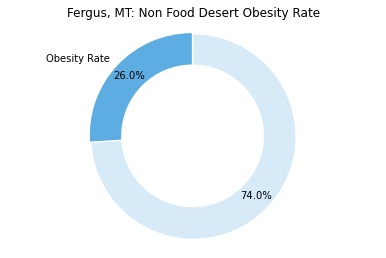

In [53]:
#Fergus Obesity
#Non Food Desert:
# Pie chart
labels = ["Obesity Rate"," "]
sizes =  [26,100-26]
colors = ["#5DADE2", "#D6EAF8"]
explode = (0.01, 0.01)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels,autopct='%1.1f%%',startangle=90, pctdistance=0.85, explode=explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout(3)
plt.title("Fergus, MT: Non Food Desert Obesity Rate")


#Save plot:
plt.savefig("PiePlots/Fergus (Non Desert) Obesity Rate.png")
plt.show()



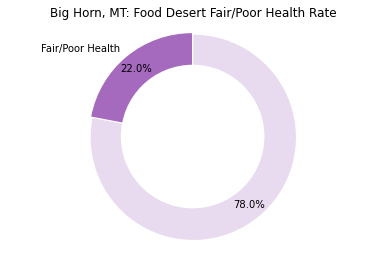

In [54]:
#BIG HORN
#Food Desert:
# Pie chart
labels = ["Fair/Poor Health"," "]
sizes =  [22,100-22]
colors = ["#A569BD", "#E8DAEF"]
explode = (0.01, 0.01)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels,autopct='%1.1f%%',startangle=90, pctdistance=0.85, explode=explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout(3)
plt.title("Big Horn, MT: Food Desert Fair/Poor Health Rate")


#Save plot:
plt.savefig("PiePlots/Big Horn (Food Desert) Health Rate.png")
plt.show()


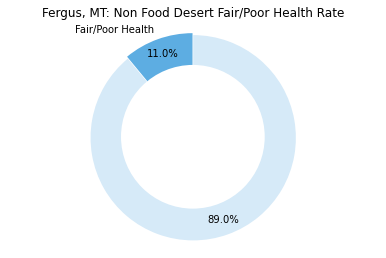

In [55]:
#Fergus Health Fair/Poor Rate
#Non Food Desert:
# Pie chart
labels = ["Fair/Poor Health"," "]
sizes =  [11,100-11]
colors = ["#5DADE2", "#D6EAF8"]
explode = (0.01, 0.01)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels,autopct='%1.1f%%',startangle=90, pctdistance=0.85, explode=explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout(3)
plt.title("Fergus, MT: Non Food Desert Fair/Poor Health Rate")


#Save plot:
plt.savefig("PiePlots/Fergus (Non Food Desert) Health Rate.png")
plt.show()


In [56]:
#Calculate diabetes medicare rate for Big Horn
bighorn_diabetes=bighornmt["# Diabetics"]/bighornmt["Original Medicare"]
bighorn_diabetes

1586    0.1201
dtype: float64

In [57]:
#Calculate diabetes medicare rate for Fergus
fergus_diabetes=fergusmt["# Diabetics"]/fergusmt["Original Medicare"]
fergus_diabetes

1598    0.064831
dtype: float64

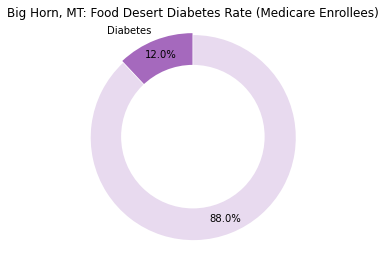

In [58]:
#Plot Diabetes for Big Horn
#Food Desert:
# Pie chart
labels = ["Diabetes"," "]
sizes =  [.12,1-.12]
colors = ["#A569BD", "#E8DAEF"]
explode = (0.01, 0.01)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels,autopct='%1.1f%%',startangle=90, pctdistance=0.85, explode=explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout(3)
plt.title("Big Horn, MT: Food Desert Diabetes Rate (Medicare Enrollees)")


#Save plot:
plt.savefig("PiePlots/Big Horn (Food Desert) Diabetes Rate.png")
plt.show()


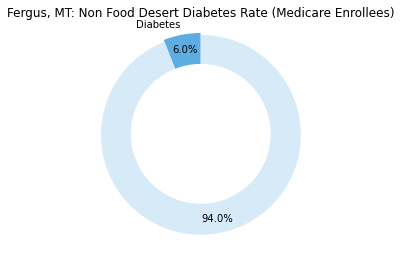

In [59]:
#Plot Diabetes for Fergus
#Non Food Desert:
# Pie chart
labels = ["Diabetes"," "]
sizes =  [.06,1-.06]
colors = ["#5DADE2", "#D6EAF8"]
explode = (0.01, 0.01)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels,autopct='%1.1f%%',startangle=90, pctdistance=0.85, explode=explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout(3)
plt.title("Fergus, MT: Non Food Desert Diabetes Rate (Medicare Enrollees)")


#Save plot:
plt.savefig("PiePlots/Fergus, MT (Non Food Desert) Diabetes Rate.png")
plt.show()


In [60]:
#Montana Race breakdown
#Census defines race by five categories: White, Black, American Indian or Alaska Native, Asian, Native Hawaiian and Other Pacific Islander, and Multiracial
#Added hispanic for breakdown purposes
#Calculate count of all race tracts:
mtwhitetract=mt_info["TractWhite"].sum()
mtblacktract=mt_info["TractBlack"].sum()
mtasiantract=mt_info["TractAsian"].sum()
mtnhopitract=mt_info["TractNHOPI"].sum()
mtaiantract=mt_info["TractAIAN"].sum()
mtomultirtract=mt_info["TractOMultir"].sum()
mthispanictract=mt_info["TractHispanic"].sum()

In [61]:
mt_tract=mtwhitetract+mtblacktract+mtasiantract+mtnhopitract+mtaiantract+mthispanictract
mt_tract

987029

In [62]:
#Creating series for each parameter. Calculating the sum of enrollees by race, grouped by environment.
mtwhite_pop = mt_info.groupby("Environment Category")["TractWhite"].sum()
mtblack_pop = mt_info.groupby("Environment Category")["TractBlack"].sum()
mtasian_pop = mt_info.groupby("Environment Category")["TractAsian"].sum()
mtnhopi_pop = mt_info.groupby("Environment Category")["TractNHOPI"].sum()
mtaian_pop = mt_info.groupby("Environment Category")["TractAIAN"].sum()
mtomultir_pop = mt_info.groupby("Environment Category")["TractOMultir"].sum()
mthispanic_pop = mt_info.groupby("Environment Category")["TractHispanic"].sum()

In [63]:
#Create dataframe to hold data
mt_race_sum_deserts_df = pd.DataFrame(
    {"White": mtwhite_pop,
    "Black": mtblack_pop,
    "Asian": mtasian_pop,
    "NHOPI": mtnhopi_pop,
    "AIAN": mtaian_pop,
    "Other/Multi": mtomultir_pop,
    "Hispanic/Latinx": mthispanic_pop})
mt_race_sum_deserts_df.reset_index()

,Environment Category,White,Black,Asian,NHOPI,AIAN,Other/Multi,Hispanic/Latinx
0,Food Desert,44884,108,242,14,29317,2239,1584
1,Healthy,840077,3919,6011,654,33238,28712,26981


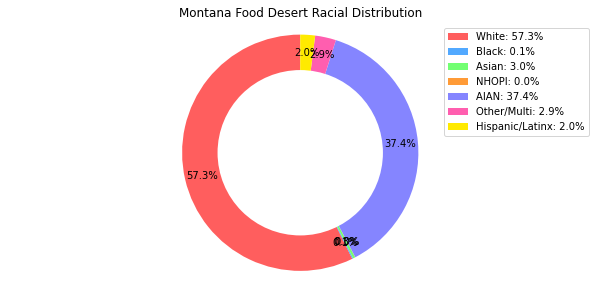

In [64]:
#Race Pie Chart
#Food Desert:
# Pie chart
labels = ['White: 57.3%', 'Black: 0.1%', 'Asian: 3.0%', 'NHOPI: 0.0%','AIAN: 37.4%','Other/Multi: 2.9%','Hispanic/Latinx: 2.0%']
sizes = [44884,108,242,14,29317,2239,1584]
#colors
colors = ['#ff5e5e','#52a9ff','#72ff72','#ff9b37','#8585ff','#ff5eaf','#ffea00']




fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, autopct='%1.1f%%', startangle=90,pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout(4)
plt.title("Montana Food Desert Racial Distribution")
plt.legend(labels)

fig.set_size_inches(10,5)

plt.savefig("PiePlots/Montana Food Desert Racial Distribution.png")
plt.show()



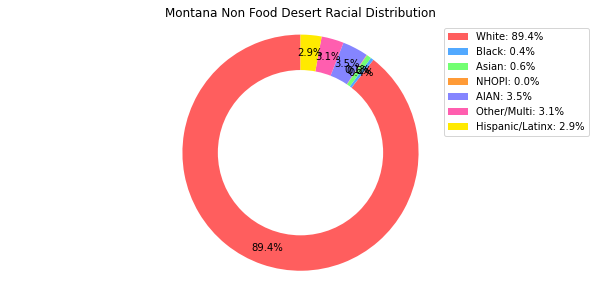

In [65]:
#Race Pie Chart
#Non Food Desert:
# Pie chart
labels = ['White: 89.4%', 'Black: 0.4%', 'Asian: 0.6%', 'NHOPI: 0.0%','AIAN: 3.5%','Other/Multi: 3.1%','Hispanic/Latinx: 2.9%']
sizes = [840077,3919,6011,654,33238,28712,26981]
#colors
colors = ['#ff5e5e','#52a9ff','#72ff72','#ff9b37','#8585ff','#ff5eaf','#ffea00']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, autopct='%1.1f%%', startangle=90,pctdistance=0.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout(4)
plt.title("Montana Non Food Desert Racial Distribution")
plt.legend(labels)

fig.set_size_inches(10,5)

plt.savefig("PiePlots/Montana Non Food Desert Racial Distribution.png")
plt.show()

